# Module 3 Assignment, Part 2

## Section 0: Setup & initialization

### Setting up your environment  

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import random
import os
import numpy as np
from scipy import stats
import seaborn as sns

###  Loading the data

Now we authenticate a Google Drive client to mount your drive and access the data file.

**Make sure to follow the interactive instructions.**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
os.chdir('/content/drive/MyDrive/Datasets/')

In [ ]:
df = pd.read_csv('diabetes_data_m3.csv')
df.index = df['Unnamed: 0']
df = df.drop(['Unnamed: 0'], axis=1)
df.index.names = ['DF Index']

In [ ]:
df.head()

,encounter_id,hospital_id,age,bmi,elective_surgery,ethnicity,gender,height,hospital_admit_source,icu_admit_source,...,h1_pao2fio2ratio_max,h1_pao2fio2ratio_min,aids,cirrhosis,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,diabetes_mellitus
DF Index,,,,,,,,,,,,,,,,,,,,,
0,255490,170,42.0,24.199083,0,2,0,170.2,14,1,...,242.389041,232.699125,0,0,0,0,0,0,0,0
1,157498,161,50.0,39.820844,0,2,0,163.0,0,1,...,242.389041,232.699125,0,0,0,0,0,0,0,0
2,188549,33,77.0,27.215126,0,2,0,154.9,4,2,...,242.389041,232.699125,0,0,0,0,0,0,0,0
3,187313,17,49.0,30.863036,1,5,1,163.0,13,2,...,242.389041,232.699125,0,0,0,0,0,0,0,0
4,259144,159,54.0,23.661272,0,2,1,177.8,15,1,...,242.389041,232.699125,0,0,0,0,0,0,0,0


##Section 1: Naive Bayes

### 1\. Split the diabetes dataset into a training and test sets

In [ ]:
df.shape

(13016, 180)

In [ ]:
X = df.loc[:, df.columns != 'diabetes_mellitus']
X.shape

(13016, 179)

In [ ]:
y = df['diabetes_mellitus']
y.head()

DF Index
0    0
1    0
2    0
3    0
4    0
Name: diabetes_mellitus, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 12)


### 2\. Train a Naive Bayes classifier on the diabetes data 

In [ ]:
from sklearn.naive_bayes import GaussianNB

clfGau = GaussianNB()
clfGau.fit(x_train, y_train)

GaussianNB()

### 3\. Use your classifier on your test data & show the [classification_report](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html) for its performance

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
y_test_pred = clfGau.predict(x_test)
print( classification_report(y_test, y_test_pred ) )

              precision    recall  f1-score   support

           0       0.85      0.88      0.86      3351
           1       0.51      0.43      0.46       945

    accuracy                           0.78      4296
   macro avg       0.68      0.66      0.66      4296
weighted avg       0.77      0.78      0.78      4296



### 4\. Show the confusion matrix heatmap for the predictions

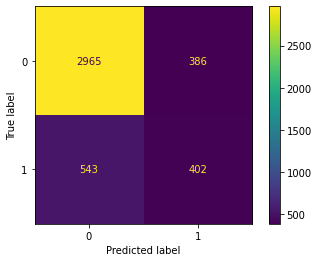

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_test_pred)
ConfusionMatrixDisplay(cm).plot()

## Section 2: Decision Tree

### 1\.  Train a Decision Tree Classifier on the diabetes data

In [ ]:
from sklearn.tree import DecisionTreeClassifier

clf_tree = DecisionTreeClassifier(random_state = 0)
clf_tree.fit(x_train, y_train)

DecisionTreeClassifier(random_state=0)

### 2\. Use your classifier on your test data & show the [classification_report](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html) for its performance

In [ ]:
y_test_pred_tree = clf_tree.predict(x_test)
print( classification_report(y_test, y_test_pred_tree ) )

              precision    recall  f1-score   support

           0       0.84      0.82      0.83      3351
           1       0.41      0.45      0.43       945

    accuracy                           0.74      4296
   macro avg       0.63      0.63      0.63      4296
weighted avg       0.75      0.74      0.74      4296



### 3\. Show the confusion matrix heatmap for the predictions

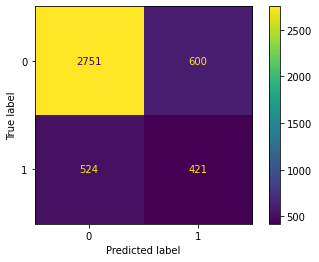

In [ ]:
cm_tree = confusion_matrix(y_test, y_test_pred_tree)
ConfusionMatrixDisplay(cm_tree).plot()

### 4\. Visualize the decision tree as a [tree diagram](https://https://scikit-learn.org/stable/modules/generated/sklearn.tree.plot_tree.html)

In [ ]:
from sklearn import tree

[Text(0.5448026259197671, 0.9861111111111112, 'X[106] <= 189.5\ngini = 0.342\nsamples = 8720\nvalue = [6810, 1910]'),
 Text(0.22324668524203783, 0.9583333333333334, 'X[106] <= 135.5\ngini = 0.206\nsamples = 6321\nvalue = [5584, 737]'),
 Text(0.09975065785459317, 0.9305555555555556, 'X[104] <= 1.502\ngini = 0.123\nsamples = 3237\nvalue = [3023, 214]'),
 Text(0.06321037442506303, 0.9027777777777778, 'X[106] <= 113.5\ngini = 0.088\nsamples = 2520\nvalue = [2404, 116]'),
 Text(0.035597756873326586, 0.875, 'X[3] <= 32.894\ngini = 0.04\nsamples = 1412\nvalue = [1383, 29]'),
 Text(0.012685545281269051, 0.8472222222222222, 'X[88] <= 204.5\ngini = 0.025\nsamples = 1199\nvalue = [1184, 15]'),
 Text(0.007933451051357138, 0.8194444444444444, 'X[62] <= 110.5\ngini = 0.023\nsamples = 1196\nvalue = [1182, 14]'),
 Text(0.0031414748169333756, 0.7916666666666666, 'X[113] <= 36.55\ngini = 0.375\nsamples = 4\nvalue = [3, 1]'),
 Text(0.0015707374084666878, 0.7638888888888888, 'gini = 0.0\nsamples = 3\nvalu

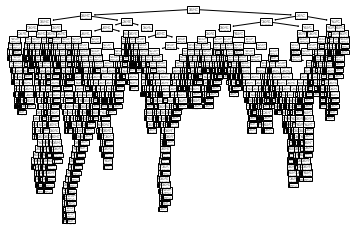

In [ ]:
tree.plot_tree(clf_tree)

### 5\. Visualize the decision tree as a text based diagram

In [ ]:
from sklearn.tree import export_text

r = export_text(clf_tree)
# will show only part of the text based diagram, otherwise, it will be too long
print(r[:1000])

|--- feature_106 <= 189.50
|   |--- feature_106 <= 135.50
|   |   |--- feature_104 <= 1.50
|   |   |   |--- feature_106 <= 113.50
|   |   |   |   |--- feature_3 <= 32.89
|   |   |   |   |   |--- feature_88 <= 204.50
|   |   |   |   |   |   |--- feature_62 <= 110.50
|   |   |   |   |   |   |   |--- feature_113 <= 36.55
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- feature_113 >  36.55
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- feature_62 >  110.50
|   |   |   |   |   |   |   |--- feature_124 <= 1.35
|   |   |   |   |   |   |   |   |--- feature_108 <= 27.50
|   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |--- feature_108 >  27.50
|   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |--- feature_124 >  1.35
|   |   |   |   |   |   |   |   |--- feature_51 <= 40.50
|   |   |   |   |   |   |   |   |   |--- feature_41 <= 1080.91
|   |   |   |   |   |   |   |   |   |   |-

### 6\.  Show the feature importances computed by the classifier

In [ ]:
# show only first 10 features, otherwise it will be too long
clf_tree.feature_importances_[:10]

array([0.0141768 , 0.01369373, 0.01493554, 0.01973854, 0.0009419 ,
       0.00391088, 0.        , 0.00780492, 0.00158028, 0.00128767])

### 7\. Create a bar chart of the feature importances with importance level on the x-axis, and the features on the y-axis

<BarContainer object of 10 artists>

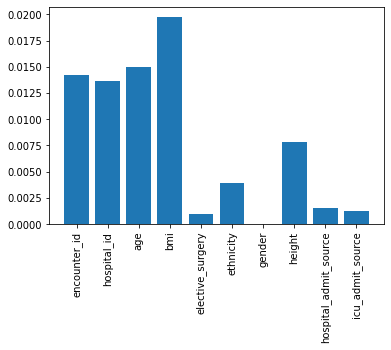

In [ ]:
plt.xticks(rotation = 'vertical')

# plot first 10 columns because it's too long
plt.bar(x_train.columns[:10], clf_tree.feature_importances_[:10])

## Section 3: Random Forest Classifier

### 1\.  Train a Random Forest Classifier on the diabetes data

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier()
rf_clf.fit(x_train, y_train)

RandomForestClassifier()

### 2\. Use your classifier on your test data & show a [classification_report](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html) for its performance

In [ ]:
y_pred = rf_clf.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.96      0.89      3351
           1       0.70      0.29      0.41       945

    accuracy                           0.82      4296
   macro avg       0.77      0.63      0.65      4296
weighted avg       0.80      0.82      0.79      4296



### 3\. Show the confusion matrix heatmap for the predictions

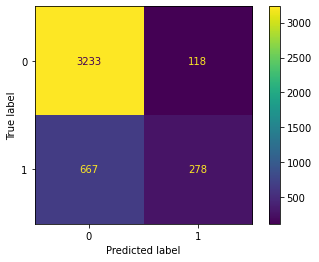

In [ ]:
rf_clf_cm = confusion_matrix(y_test, y_pred)
dis = ConfusionMatrixDisplay(rf_clf_cm)
dis.plot()

### Run the following cells to visualize the Random Forest

In [ ]:
from sklearn.tree import export_graphviz

# Export as dot file
estimator = rf_clf.estimators_[5]

export_graphviz(estimator, out_file='tree.dot', 
                feature_names = x_train.columns,
                # need to change this because can only take string, not numpy object
                class_names = np.array2string(y.unique()),
                rounded = True, proportion = False, 
                precision = 2, filled = True)

In [ ]:
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

0

In [ ]:
from IPython.display import Image
Image(filename = 'tree.png')

### 4\. Print out the [feature_importances_](https://https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) computed by the classifier

In [ ]:
rf_clf.feature_importances_

array([8.83930692e-03, 9.42980847e-03, 1.04944547e-02, 2.12720234e-02,
       5.73933386e-04, 2.57071439e-03, 1.10911750e-03, 7.42808554e-03,
       3.42732285e-03, 1.88444404e-03, 8.61075537e-03, 4.72004418e-04,
       3.52098886e-03, 8.61482518e-03, 0.00000000e+00, 1.73026769e-02,
       4.25828510e-03, 6.43660922e-03, 7.57015655e-03, 5.44862894e-04,
       3.46425162e-03, 3.93550616e-03, 7.64389796e-03, 8.27525261e-03,
       2.06168686e-03, 1.93350410e-03, 1.96737798e-03, 2.61456814e-04,
       2.82676803e-03, 6.13259403e-02, 8.08425723e-03, 6.45526126e-03,
       1.31367716e-03, 7.41900502e-03, 2.50889943e-03, 2.45079553e-03,
       2.43606886e-03, 2.83894417e-03, 6.63227644e-03, 5.15157199e-03,
       6.09803615e-03, 6.20106595e-03, 1.27244475e-03, 7.37493039e-03,
       3.59158508e-03, 3.39914496e-03, 6.95167264e-03, 6.68787574e-03,
       6.80382531e-03, 6.43501390e-03, 9.19732859e-03, 7.02591601e-03,
       3.36845311e-03, 3.37116630e-03, 6.61764131e-03, 6.15333647e-03,
      

### 5\. Create a bar chart of the feature importances with importance level on the x-axis, and the features on the y-axis

<BarContainer object of 10 artists>

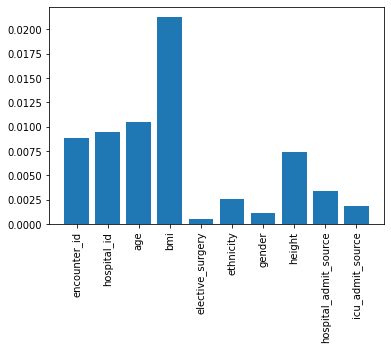

In [ ]:
plt.xticks(rotation = 'vertical')

# plot first 10 columns because it's too long
plt.bar(x_train.columns[:10], rf_clf.feature_importances_[:10])

## Section 4: XGB Classifier

### 1\. Train an XGB Classifier on the diabetes data


In [ ]:
import xgboost as xgb

In [ ]:
xg_classifier = xgb.XGBClassifier()

In [ ]:
xg_classifier.fit(x_train, y_train)

XGBClassifier()

In [ ]:
y_pred1 = xg_classifier.predict(x_test)

### 2\. Use your classifier on your test data & show the [classification_report](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html) for its performance

In [ ]:
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.85      0.95      0.90      3351
           1       0.69      0.41      0.52       945

    accuracy                           0.83      4296
   macro avg       0.77      0.68      0.71      4296
weighted avg       0.82      0.83      0.81      4296



### 3\. Show the confusion matrix heatmap for the predictions

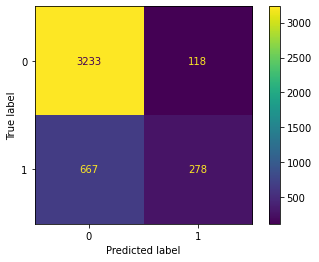

In [ ]:
xg_classifier_cm = confusion_matrix(y_test, y_pred1)
xg_dis = ConfusionMatrixDisplay(rf_clf_cm)
xg_dis.plot()